# <center>Assignment 3<center>
<center>Allison Lau (23123849)<center>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Tasks
## Reading the dataset

In [2]:
# Read dataset from csv file
dataset = pd.read_csv('housingCalifornia.csv')
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

Number of rows: 20640
Number of columns: 10


### D1 Exploratory data analysis and preprocessing
#### (a) Histograms

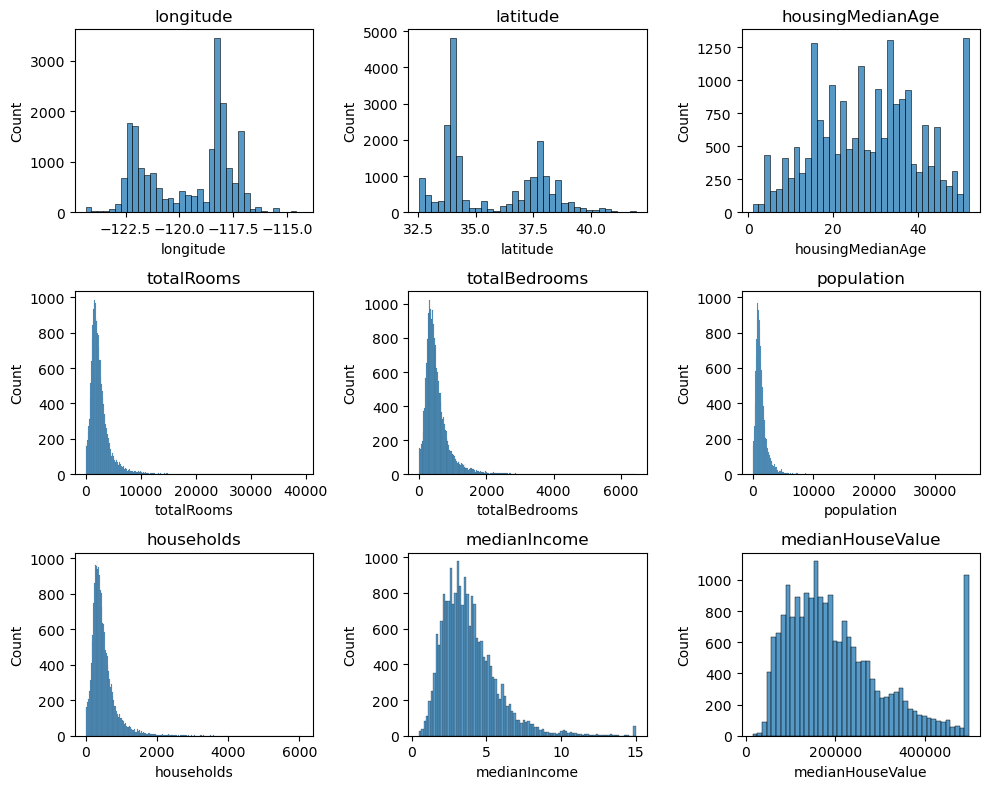

In [3]:
# Numerical columns + Target column
non_categorical = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']

# Create a grid subplot
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

# Plot histograms for non-categorical features and target
for i, col in enumerate(non_categorical):
    sns.histplot(dataset[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### (b) Correlation matrix

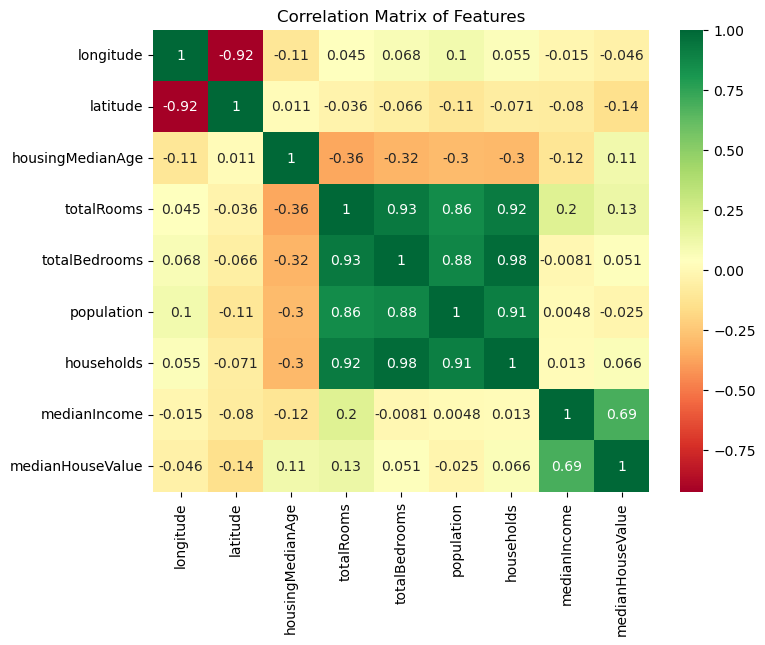

In [4]:
# Compute correlation matrix
correlation_matrix = dataset[non_categorical].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Features')
plt.show()

#### (c) Scatter plot

In [5]:
# Numerical columns
numerical_columns = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']

# # Plot scatter plots for each numerical column against the target variable
# df_scatterplot = dataset[non_categorical]
# scatter_matrix = sns.pairplot(df_scatterplot, diag_kind='hist')
# scatter_matrix.figure.suptitle('Scatter Plot of Numerical Features against Median House Value', y=1.02)
# plt.show()

# # Create a grid of subplots
# fig, axes = plt.subplots(3, 3, figsize=(10, 8))
# axes = axes.flatten()

# # Plot scatter plots for each numerical column against the target variable
# for i, col in enumerate(numerical_columns):
#     axes[i].scatter(dataset[col], dataset['medianHouseValue'], alpha=0.5)
#     axes[i].set_title(f'{col} vs. medianHouseValue')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('medianHouseValue')
    
# plt.tight_layout()
# plt.show()

## Analysing the impact of different data transformations

In [6]:
# Create dataset 1
data1 = pd.get_dummies(dataset, columns=['oceanProximity'], drop_first=True)

# Create dataset 2
data2 = data1.copy()
data2['medianHouseValue'] /= 100000.0

# Display shape of the datasets
print("data1:", data1.shape)
print("data2:", data2.shape)

data1: (20640, 13)
data2: (20640, 13)


### D2 Split datasets and fit Linear Regression and Lasso Regression model

In [7]:
# Function to split and standardise the data
def split_and_standardise(data):
    # Split the dataset into features and target
    X = data.drop('medianHouseValue', axis=1)
    y = data['medianHouseValue']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

    # Standardise the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test

# Function to fit Linear Regression model
def fit_linear_regression(X_train, y_train):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model

# Function to fit Lasso Regression model
def fit_lasso_regression(X_train, y_train, alpha):
    ls_model = Lasso(alpha=alpha, random_state=5508)
    ls_model.fit(X_train, y_train)
    return ls_model

# Function to calculate RMSE for training and testing sets
def calculate_rmse(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return rmse_train, rmse_test

In [8]:
# Split data1 into training and test sets and standardise the datasets
X1_train_scaled, X1_test_scaled, X1_train, X1_test, y1_train, y1_test = split_and_standardise(data1)

# Split data2 into training and test sets and standardise the datasets
X2_train_scaled, X2_test_scaled, X2_train, X2_test, y2_train, y2_test = split_and_standardise(data2)

# Fit models on STANDARDISED data1
data1_linear_scaled = fit_linear_regression(X1_train_scaled, y1_train)
data1_lasso_scaled = fit_lasso_regression(X1_train_scaled, y1_train, alpha=100)

# Fit models on NON-STANDARDISED data1
data1_linear = fit_linear_regression(X1_train, y1_train)
data1_lasso = fit_lasso_regression(X1_train, y1_train, alpha=100)

# Fit models on STANDARDISED data2
data2_linear_scaled = fit_linear_regression(X2_train_scaled, y2_train)
data2_lasso_scaled = fit_lasso_regression(X2_train_scaled, y2_train, alpha=100)

# Fit models on NON-STANDARDISED data2
data2_linear = fit_linear_regression(X2_train, y2_train)
data2_lasso = fit_lasso_regression(X2_train, y2_train, alpha=100)

#### (a) Table of RMSE for training and test sets for both models for each dataset

In [9]:
# Calculate RMSE for standardised datasets (both models)
rmse1_train_linear_scaled, rmse1_test_linear_scaled = calculate_rmse(data1_linear_scaled, X1_train_scaled, y1_train, X1_test_scaled, y1_test)
rmse1_train_lasso_scaled, rmse1_test_lasso_scaled = calculate_rmse(data1_lasso_scaled, X1_train_scaled, y1_train, X1_test_scaled, y1_test)
rmse2_train_linear_scaled, rmse2_test_linear_scaled = calculate_rmse(data2_linear_scaled, X2_train_scaled, y2_train, X2_test_scaled, y2_test)
rmse2_train_lasso_scaled, rmse2_test_lasso_scaled = calculate_rmse(data2_lasso_scaled, X2_train_scaled, y2_train, X2_test_scaled, y2_test)

# Calculate RMSE for non-standardised datasets (both models)
rmse1_train_linear, rmse1_test_linear = calculate_rmse(data1_linear, X1_train, y1_train, X1_test, y1_test)
rmse1_train_lasso, rmse1_test_lasso = calculate_rmse(data1_lasso, X1_train, y1_train, X1_test, y1_test)
rmse2_train_linear, rmse2_test_linear = calculate_rmse(data2_linear, X2_train, y2_train, X2_test, y2_test)
rmse2_train_lasso, rmse2_test_lasso = calculate_rmse(data2_lasso, X2_train, y2_train, X2_test, y2_test)

# Display a table for RMSE values
table_data = [
    ["Linear Regression (data1) - Standardized", rmse1_train_linear_scaled, rmse1_test_linear_scaled],
    ["Lasso Regression (data1) - Standardized", rmse1_train_lasso_scaled, rmse1_test_lasso_scaled],
    ["Linear Regression (data1) - Non-standardized", rmse1_train_linear, rmse1_test_linear],
    ["Lasso Regression (data1) - Non-standardized", rmse1_train_lasso, rmse1_test_lasso],
    ["Linear Regression (data2) - Standardized", rmse2_train_linear_scaled, rmse2_test_linear_scaled],
    ["Lasso Regression (data2) - Standardized", rmse2_train_lasso_scaled, rmse2_test_lasso_scaled],
    ["Linear Regression (data2) - Non-standardized", rmse2_train_linear, rmse2_test_linear],
    ["Lasso Regression (data2) - Non-standardized", rmse2_train_lasso, rmse2_test_lasso]
]
table = pd.DataFrame(table_data, columns=['Model', 'Training set RMSE', 'Test set RMSE'])
print(table.to_string(index=False))

                                       Model  Training set RMSE  Test set RMSE
    Linear Regression (data1) - Standardized       68607.314131   68589.312340
     Lasso Regression (data1) - Standardized       68615.441095   68623.383563
Linear Regression (data1) - Non-standardized       68607.314131   68589.312340
 Lasso Regression (data1) - Non-standardized       68660.504643   68601.809500
    Linear Regression (data2) - Standardized           0.686073       0.685893
     Lasso Regression (data2) - Standardized           1.156303       1.144382
Linear Regression (data2) - Non-standardized           0.686073       0.685893
 Lasso Regression (data2) - Non-standardized           1.129396       1.119761


### D3 New features - Dataset 3

In [10]:
# Create dataset 3
data3 = data2.copy()
data3['meanRooms'] = data3['totalRooms'] / data3['households']
data3['meanBedrooms'] = data3['totalBedrooms'] / data3['households']
data3['meanOccupation'] = data3['population'] / data3['households']
deleted_columns = ['totalRooms', 'totalBedrooms', 'population', 'households']
data3 = data3.drop(deleted_columns, axis=1)

# Split data3 into training and test sets and standardise the datasets
X3_train_scaled, X3_test_scaled, X3_train, X3_test, y3_train, y3_test = split_and_standardise(data3)

# Fit models on STANDARDISED data3
data3_linear_scaled = fit_linear_regression(X3_train_scaled, y3_train)
data3_lasso_scaled = fit_lasso_regression(X3_train_scaled, y3_train, alpha=100)

# Fit models on NON-STANDARDISED data3
data3_linear = fit_linear_regression(X3_train, y3_train)
data3_lasso = fit_lasso_regression(X3_train, y3_train, alpha=100)

#### (a) Table of RMSE for training and test sets for both models for each dataset

In [11]:
# Calculate RMSE for dataset 3 (both models)
rmse_lr_data3_train_scaled, rmse_lr_data3_test_scaled = calculate_rmse(data3_linear_scaled, X3_train_scaled, y3_train, X3_test_scaled, y3_test)
rmse_lasso_data3_train_scaled, rmse_lasso_data3_test_scaled = calculate_rmse(data3_lasso_scaled, X3_train_scaled, y3_train, X3_test_scaled, y3_test)

rmse_lr_data3_train, rmse_lr_data3_test = calculate_rmse(data3_linear, X3_train, y3_train, X3_test, y3_test)
rmse_lasso_data3_train, rmse_lasso_data3_test = calculate_rmse(data3_lasso, X3_train, y3_train, X3_test, y3_test)

# Display a table for RMSE values
table_data = [
    ["Linear Regression (scaled)", rmse_lr_data3_train_scaled, rmse_lr_data3_test_scaled],
    ["Lasso Regression (scaled)", rmse_lasso_data3_train_scaled, rmse_lasso_data3_test_scaled],
    ["Linear Regression (not scaled)", rmse_lr_data3_train, rmse_lr_data3_test],
    ["Lasso Regression (not scaled)", rmse_lasso_data3_train, rmse_lasso_data3_test]
]
table = pd.DataFrame(table_data, columns=['Model', 'Training set RMSE', 'Test set RMSE'])
print(table.to_string(index=False))

                         Model  Training set RMSE  Test set RMSE
    Linear Regression (scaled)           0.709490       1.136010
     Lasso Regression (scaled)           1.156303       1.144382
Linear Regression (not scaled)           0.709490       1.136010
 Lasso Regression (not scaled)           1.156303       1.144382


#### (c) Estimated parameter values

In [12]:
# Get the coefficient values for data1 models
coefficients_data1 = {
    "Linear Regression (data1) - Standardized": data1_linear_scaled.coef_,
    "Lasso Regression (data1) - Standardized": data1_lasso_scaled.coef_,
    "Linear Regression (data1) - Non-standardized": data1_linear.coef_,
    "Lasso Regression (data1) - Non-standardized": data1_lasso.coef_
}

# Get the coefficient values for data2 models
coefficients_data2 = {
    "Linear Regression (data2) - Standardized": data2_linear_scaled.coef_,
    "Lasso Regression (data2) - Standardized": data2_lasso_scaled.coef_,
    "Linear Regression (data2) - Non-standardized": data2_linear.coef_,
    "Lasso Regression (data2) - Non-standardized": data2_lasso.coef_
}

# Get the coefficient values for data3 models
coefficients_data3 = {
    "Linear Regression (data3) - Standardized": data3_linear_scaled.coef_,
    "Lasso Regression (data3) - Standardized": data3_lasso_scaled.coef_,
    "Linear Regression (data3) - Non-standardized": np.concatenate((data3_linear.coef_[:8], data3_linear.coef_[9:])),  # Exclude the NaN coefficient for the dropped column
    "Lasso Regression (data3) - Non-standardized": np.concatenate((data3_lasso.coef_[:8], data3_lasso.coef_[9:]))   # Exclude the NaN coefficient for the dropped column
}

# Create a table to report the estimated parameter values with corresponding variable names
parameter_table_data1 = pd.DataFrame(list(coefficients_data1.items()), columns=["Model", "Estimated Parameters"])
parameter_table_data2 = pd.DataFrame(list(coefficients_data2.items()), columns=["Model", "Estimated Parameters"])
parameter_table_data3 = pd.DataFrame(list(coefficients_data3.items()), columns=["Model", "Estimated Parameters"])

# Display the table for data1, data2, and data3
print("Data1 Models:")
print(parameter_table_data1.to_string(index=False))
print("~" * 100)
print("Data2 Models:")
print(parameter_table_data2.to_string(index=False))
print("~" * 100)
print("Data3 Models:")
print(parameter_table_data3.to_string(index=False))

Data1 Models:
                                       Model                                                                                                                                                                                                                            Estimated Parameters
    Linear Regression (data1) - Standardized [-53194.88602852108, -54426.48595977642, 13309.925997845423, -14090.64943136587, 43350.06429325439, -41771.49507936584, 17290.240436613163, 74889.21638036135, -18231.72162218455, 2672.2075380597494, -247.44444565547747, 1648.3297345259634]
     Lasso Regression (data1) - Standardized                [-50311.456262787266, -51488.49568911474, 13258.916153687409, -12015.246255130152, 41169.56634098892, -41042.17058658448, 16763.7829925198, 74413.03814317149, -19118.76764483002, 2593.7777820527817, -0.0, 1736.2549952775764]
Linear Regression (data1) - Non-standardized    [-26533.237894224938, -25444.91084167417, 1055.9001449693355, -6.428985689575711, 1

## Analysing the impact of different models
### D4 Lasso Regression using 10-fold cross-validation for Dataset 3

In [13]:
alpha_values = [0.0000001, 0.000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100]

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=5508))
])

pg_lasso = {
    'lasso__alpha': alpha_values
}

# Perform 10-fold cross-validation with GridSearchCV
kf_lasso = KFold(n_splits=10, shuffle=True, random_state=5508)
grid_search_lasso = GridSearchCV(pipeline_lasso, pg_lasso, cv=kf_lasso, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=5508))]),
             param_grid={'lasso__alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.01, 0.1,
                                          1, 10, 100]},
             scoring='neg_mean_squared_error')

#### (a) Report results

In [14]:
# Get the optimal alpha value according to grid search
best_params_lasso = grid_search_lasso.best_params_
best_alpha_lasso = best_params_lasso['lasso__alpha']

# Calculate RMSE for the best estimator
best_estimator_lasso = grid_search_lasso.best_estimator_
rmse_train_lasso, rmse_test_lasso = calculate_rmse(best_estimator_lasso, X3_train_scaled, y3_train, X3_test_scaled, y3_test)

# Get the estimated parameter values with the corresponding variable names
best_coefficients_lasso = best_estimator_lasso.named_steps['lasso'].coef_
feature_names = X3_train.columns.tolist()
parameter_values_lasso = dict(zip(feature_names, best_coefficients_lasso))
table_lasso = pd.DataFrame(list(parameter_values_lasso.items()), columns=["Feature", "Estimated Parameter"])

# Report results
print(f"Optimal alpha value : {best_alpha_lasso}")
print(f"Training set RMSE   : {rmse_train_lasso}")
print(f"Test set RMSE       : {rmse_test_lasso}")
print("Estimated Parameters")
print(table_lasso.to_string(index=False))

Optimal alpha value : 0.001
Training set RMSE   : 0.7095538859232345
Test set RMSE       : 1.1289384839843495
Estimated Parameters
                  Feature  Estimated Parameter
                longitude            -0.496114
                 latitude            -0.501293
         housingMedianAge             0.105784
             medianIncome             0.788218
    oceanProximity_INLAND            -0.187397
    oceanProximity_ISLAND             0.025862
  oceanProximity_NEAR BAY             0.018311
oceanProximity_NEAR OCEAN             0.028344
                meanRooms            -0.185076
             meanBedrooms             0.222489
           meanOccupation            -0.086654


### D5 Ridge Regression using 10-fold cross-validation for Dataset 3

In [15]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=5508))
])

pg_ridge = {
    'ridge__alpha': alpha_values
}

# Perform 10-fold cross-validation with GridSearchCV
kf_ridge = KFold(n_splits=10, shuffle=True, random_state=5508)
grid_search_ridge = GridSearchCV(pipeline_ridge, pg_ridge, cv=kf_ridge, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=5508))]),
             param_grid={'ridge__alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.01, 0.1,
                                          1, 10, 100]},
             scoring='neg_mean_squared_error')

#### (a) Report results

In [16]:
# Get the optimal alpha value according to grid search
best_params_ridge = grid_search_lasso.best_params_
best_alpha_ridge = best_params_lasso['lasso__alpha']

# Calculate RMSE for the best estimator
best_estimator_ridge = grid_search_ridge.best_estimator_
rmse_train_ridge, rmse_test_ridge = calculate_rmse(best_estimator_ridge, X3_train_scaled, y3_train, X3_test_scaled, y3_test)

# Get the estimated parameter values with the corresponding variable names
best_coefficients_ridge = best_estimator_ridge.named_steps['ridge'].coef_
feature_names = X3_train.columns.tolist()
parameter_values_ridge = dict(zip(feature_names, best_coefficients_ridge))
table_ridge = pd.DataFrame(list(parameter_values_ridge.items()), columns=["Feature", "Estimated Parameter"])

# Report results
print(f"Optimal alpha value : {best_alpha_ridge}")
print(f"Training set RMSE   : {rmse_train_ridge}")
print(f"Test set RMSE       : {rmse_test_ridge}")
print("Estimated Parameters")
print(table_ridge.to_string(index=False))

Optimal alpha value : 0.001
Training set RMSE   : 0.7098876172951974
Test set RMSE       : 1.1314258937783133
Estimated Parameters
                  Feature  Estimated Parameter
                longitude            -0.438580
                 latitude            -0.441902
         housingMedianAge             0.106570
             medianIncome             0.781283
    oceanProximity_INLAND            -0.204392
    oceanProximity_ISLAND             0.027128
  oceanProximity_NEAR BAY             0.021768
oceanProximity_NEAR OCEAN             0.032337
                meanRooms            -0.173267
             meanBedrooms             0.209397
           meanOccupation            -0.086887


### D6 Decision Tree Regression using 10-fold cross-validation for Dataset 3

In [17]:
max_depth_values = range(3, 15, 1)

pipeline_dt  = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=5508))
])

pg_dt = {
    'dt__max_depth': max_depth_values
}

# Perform 10-fold cross-validation with GridSearchCV
kf_dt = KFold(n_splits=10, shuffle=True, random_state=5508)
grid_search_dt = GridSearchCV(pipeline_dt, pg_dt, cv=kf_dt, scoring='neg_mean_squared_error')
grid_search_dt.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=5508))]),
             param_grid={'dt__max_depth': range(3, 15)},
             scoring='neg_mean_squared_error')

#### (a) Report results

In [18]:
# Get the optimal alpha value according to grid search
best_params_dt = grid_search_dt.best_params_
best_max_depth_dt = best_params_dt['dt__max_depth']

# Calculate RMSE for the best estimator
best_estimator_dt = grid_search_dt.best_estimator_
rmse_train_dt, rmse_test_dt = calculate_rmse(best_estimator_dt, X3_train_scaled, y3_train, X3_test_scaled, y3_test)

# Report results
print(f"Optimal alpha value : {best_max_depth_dt}")
print(f"Training set RMSE   : {rmse_train_dt}")
print(f"Test set RMSE       : {rmse_test_dt}")

Optimal alpha value : 9
Training set RMSE   : 0.5026714397455402
Test set RMSE       : 0.6015424327407188


### D8 Principle Component Analysis (PCA) in the training set using the standardised features for Dataset 3
#### (a) Plot of cumulative explained variance ratio against number of principal components

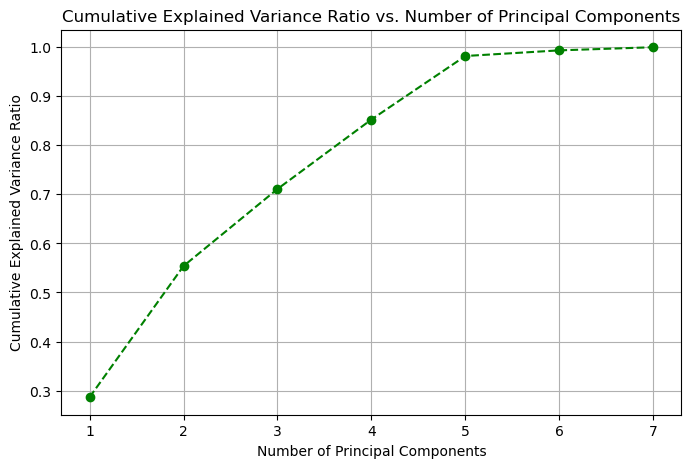

In [19]:
numerical = ['longitude', 'latitude', 'housingMedianAge', 'medianIncome', 'meanRooms', 'meanBedrooms', 'meanOccupation', 'medianHouseValue']

# Split data into training and test sets and standardise the datasets
X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test = split_and_standardise(data3[numerical])

# Apply PCA on the standardised features
pca = PCA(random_state=5508)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = range(1, len(cumulative_variance_ratio) + 1)
plt.figure(figsize=(8, 5))
plt.plot(num_components, cumulative_variance_ratio, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

#### (b) Number of principal components required to preserve at least 90% of the variance

In [20]:
# Determine the number of principal components necessary to preserve at least 90% of the variance
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print("Number of Principal Components to Preserve 90% of Variance:", n_components_90)

Number of Principal Components to Preserve 90% of Variance: 5


#### (c) Linear Regression using selected number of principal components and report results

In [21]:
# Train a Linear Regression model using the selected number of principal components
pca_selected = PCA(n_components=n_components_90, random_state=5508)
X_train_pca_selected = pca_selected.fit_transform(X_train_scaled)
X_test_pca_selected = pca_selected.transform(X_test_scaled)

# Train a Linear Regression model
linear_pca = LinearRegression()
linear_pca.fit(X_train_pca_selected, y_train)

# Calculate RMSE for the training and test data
rmse_train_pca, rmse_test_pca = calculate_rmse(linear_pca, X_train_pca_selected, y_train, X_test_pca_selected, y_test)

# Report results
print(f"Training set RMSE   : {rmse_train_pca}")
print(f"Test set RMSE       : {rmse_test_pca}")

Training set RMSE   : 0.8058705407640099
Test set RMSE       : 1.3394144069946134


#### (d) Optimal number of principal components using 10-fold cross-validation

In [22]:
n_components = np.arange(1, X_train_scaled.shape[1] + 1)

pipeline_pca = Pipeline([
    ('pca', PCA(random_state=5508)),
    ('linear_reg', LinearRegression())
])

pg_pca = {
    'pca__n_components': n_components
}

# Perform 10-fold cross-validation with GridSearchCV
kf_pca = KFold(n_splits=10, shuffle=True, random_state=5508)
grid_search_pca = GridSearchCV(pipeline_pca, pg_pca, cv=kf_pca, scoring='neg_mean_squared_error')
grid_search_pca.fit(X_train_scaled, y_train)

# Get the optimal number of principal components according to grid search
best_params_pca = grid_search_pca.best_params_
optimal_n_components = best_params_pca['pca__n_components']

# Train a Linear Regression model using the selected number of principal components
pca_optimal = PCA(n_components=optimal_n_components, random_state=5508)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)

# Train a Linear Regression model
linear_pca_optimal = LinearRegression()
linear_pca_optimal.fit(X_train_pca_optimal, y_train)

# Calculate RMSE for the training and test data
rmse_train_pca_opt, rmse_test_pca_opt = calculate_rmse(linear_pca_optimal, X_train_pca_optimal, y3_train, X_test_pca_optimal, y3_test)

# Report results
print(f"Optimal number of principal components : {optimal_n_components}")
print(f"Training set RMSE   : {rmse_train_pca}")
print(f"Test set RMSE       : {rmse_test_pca}")


Optimal number of principal components : 7
Training set RMSE   : 0.8058705407640099
Test set RMSE       : 1.3394144069946134


## Clustering analysis
### D9 Create dataset 4 - dataset 3 without categorical variables

In [23]:
# Create dataset 4 (without categorical variables)
remove_categorical = ['oceanProximity_INLAND', 'oceanProximity_ISLAND', 'oceanProximity_NEAR BAY', 'oceanProximity_NEAR OCEAN']
data4 = data3.copy()
data4 = data4.drop(remove_categorical, axis=1)

# Standardise the data
scaler4 = StandardScaler()
data4_scaled = scaler4.fit_transform(data4)
data4_scaled = pd.DataFrame(data4_scaled, columns=data4.columns)

# Perform PCA on the standardised data
pca = PCA(n_components=2)
data4_pca = pca.fit_transform(data4_scaled)

# Function to plot dendogram of hierarchical clustering
def plot_dendrogram(Z, n_clusters, title=''):
    plt.figure(figsize=(12, 8))
    dendrogram(Z, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram {title}')
    plt.xlabel('Sample Index or (Cluster Size)')
    plt.ylabel('Distance')
    plt.show()

# Function to get mean and size of each cluster
def hierarchical_clustering_mean(data, Z, n_clusters):
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    data_clustered = data.copy()
    data_clustered['cluster'] = clusters
    
    # Calculate the mean of the variables for each cluster
    cluster_means = data_clustered.groupby('cluster').mean()
    
    # Calculate the size of each cluster
    cluster_sizes = data_clustered['cluster'].value_counts().sort_index()
    
    return cluster_means, cluster_sizes

#### (a) Hierarchical clustering with average linkage and Euclidean distance with dataset 4

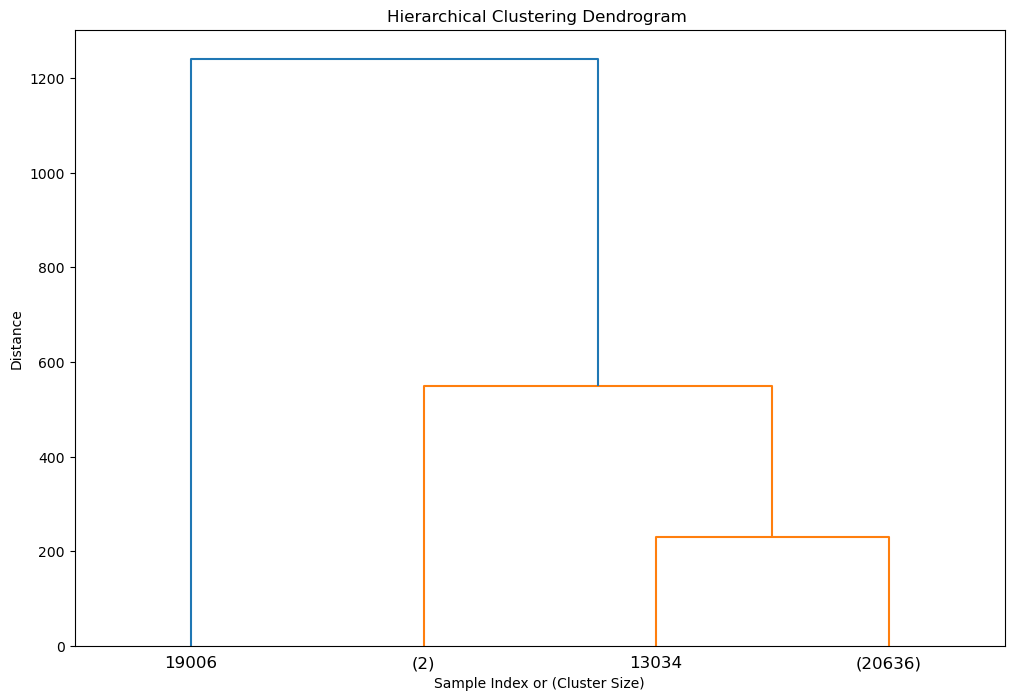

Mean of the variables for each cluster
          longitude   latitude  housingMedianAge  medianIncome  medianHouseValue  meanRooms  meanBedrooms  meanOccupation
cluster                                                                                                                  
1       -120.605000  37.865000         41.000000      4.890900          2.087500   7.109890      1.225275      551.087912
2       -119.569411  35.631367         28.636364      3.870154          2.068581   5.428809      1.096655        2.946435
3       -121.150000  38.690000         52.000000      6.135900          2.250000   8.275862      1.517241      230.172414
4       -121.980000  38.320000         45.000000     10.226400          1.375000   3.166667      0.833333     1243.333333
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Size of each cluster
cluster
1        2
2    20636
3        1
4        1


In [24]:
# Perform hierarchical clustering
Z_9a = linkage(data4, method='average', metric='euclidean')

# Plot the dendrogram
plot_dendrogram(Z_9a, 4)

# Get mean and size for each cluster
cluster_means, cluster_sizes = hierarchical_clustering_mean(data4, Z_9a, 4)

# Print results
print("Mean of the variables for each cluster")
print(cluster_means.to_string())
print("~" * 100)
print("Size of each cluster")
print(cluster_sizes.to_string())

#### (b) Hierarchical clustering with average linkage and Euclidean distance with standardised dataset 4

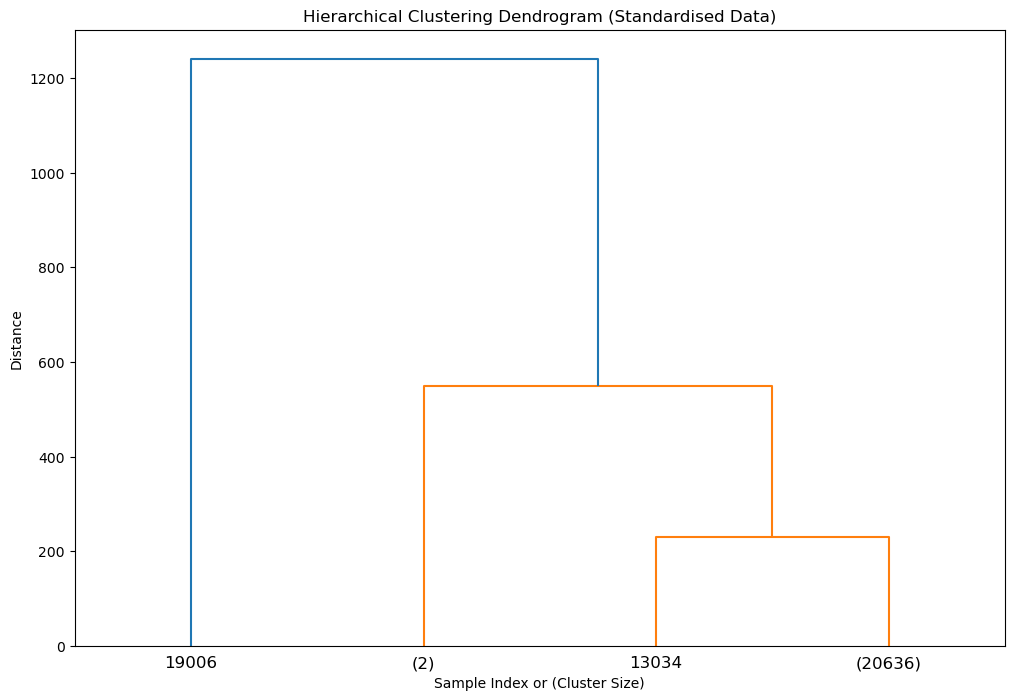

Mean of the variables for each cluster
         longitude  latitude  housingMedianAge  medianIncome  medianHouseValue  meanRooms  meanBedrooms  meanOccupation
cluster                                                                                                                
1        -0.259695  1.509030          0.386207     -0.326708          1.078011  53.268465     60.677100       -0.048818
2        -0.516748  1.045525          0.982143      0.537026          0.016415   0.679391      0.271365       52.766023
3         0.000134 -0.000309         -0.000196     -0.000183         -0.000077  -0.005184     -0.005880       -0.010897
4        -1.203053  1.258550          1.299975      3.345515         -0.601041  -0.914402     -0.555691      119.419103
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Size of each cluster
cluster
1        2
2        2
3    20635
4        1


In [25]:
# Perform hierarchical clustering
Z_9b = linkage(data4_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plot_dendrogram(Z_9a, 4, '(Standardised Data)')

# Get mean and size for each cluster
cluster_means, cluster_sizes = hierarchical_clustering_mean(data4_scaled, Z_9b, 4)

# Print results
print("Mean of the variables for each cluster")
print(cluster_means.to_string())
print("~" * 100)
print("Size of each cluster")
print(cluster_sizes.to_string())

#### (c) k-means clustering (with k=4) with Euclidean distance iwth standardised dataset 4

In [26]:
initial_centroids = cluster_means.values

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=5508)
kmeans.fit(data4_scaled)

data4_clustered = data4_scaled.copy()
data4_clustered['kmeans_cluster'] = kmeans.labels_

# Calculate the mean of the variables for each k-means cluster
kmeans_cluster_means = data4_clustered.groupby('kmeans_cluster').mean()
kmeans_cluster_sizes = data4_clustered['kmeans_cluster'].value_counts().sort_index()

# Print results
print("Mean of the variables for each cluster")
print(kmeans_cluster_means.to_string())
print("~" * 100)
print("Size of each cluster")
print(kmeans_cluster_sizes.to_string())

Mean of the variables for each cluster
                longitude  latitude  housingMedianAge  medianIncome  medianHouseValue  meanRooms  meanBedrooms  meanOccupation
kmeans_cluster                                                                                                                
0               -0.259695  1.509030          0.386207     -0.326708          1.078011  53.268465     60.677100       -0.048818
1               -0.516748  1.045525          0.982143      0.537026          0.016415   0.679391      0.271365       52.766023
2                0.000134 -0.000309         -0.000196     -0.000183         -0.000077  -0.005184     -0.005880       -0.010897
3               -1.203053  1.258550          1.299975      3.345515         -0.601041  -0.914402     -0.555691      119.419103
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Size of each cluster
kmeans_cluster
0        2
1        2
2    20635
3        1


#### (d) Hierarchical clustering with average linkage and Euclidean distance on the first two principal component scores with standardised dataset 4 (PCA with 2 components)

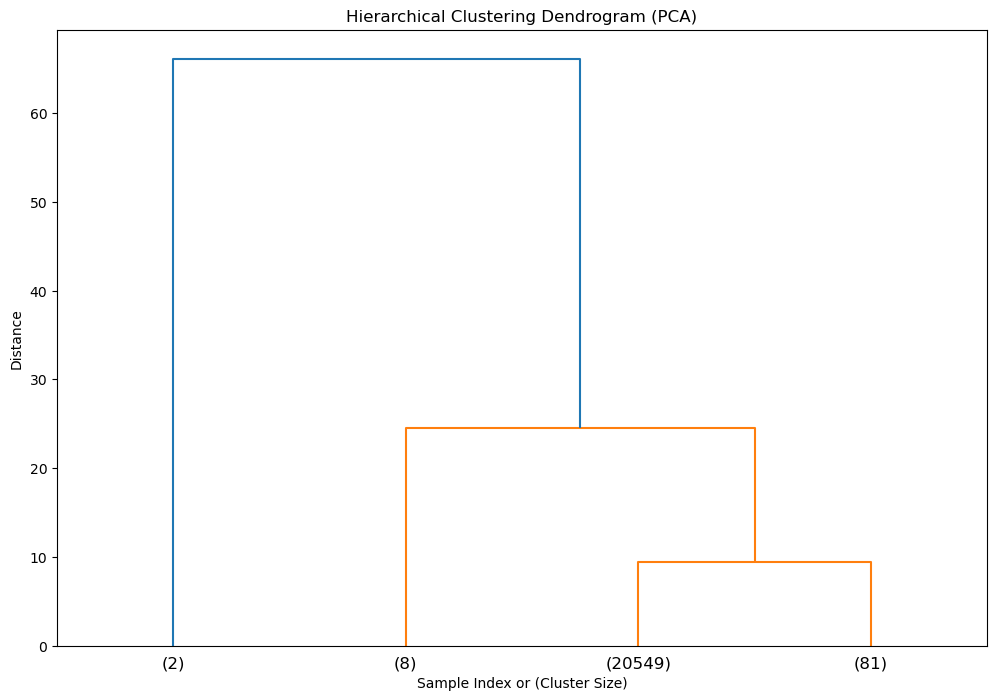

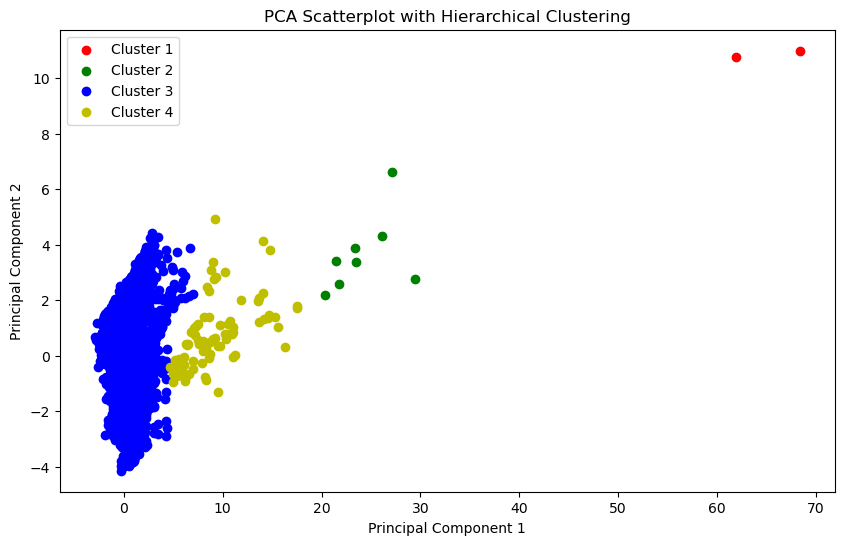

In [27]:
# Perform hierarchical clustering on the first two principal component scores
Z_pca = linkage(data4_pca, method='average', metric='euclidean')

# Plot the dendrogram
plot_dendrogram(Z_pca, 4, '(PCA)')

clusters_pca = fcluster(Z_pca, 4, criterion='maxclust')

# Scatterplot of the first two principal components with different colors for each cluster
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(1, 5):
    x_scatter = data4_pca[clusters_pca == i, 0]
    y_scatter = data4_pca[clusters_pca == i, 1]
    plt.scatter(x_scatter, y_scatter, c=colors[i-1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot with Hierarchical Clustering')
plt.legend()
plt.show()

#### (e) k-means clustering (with k=4) with Euclidean distance on the first two principal component scores with standardised dataset 4 (PCA with 2 components)

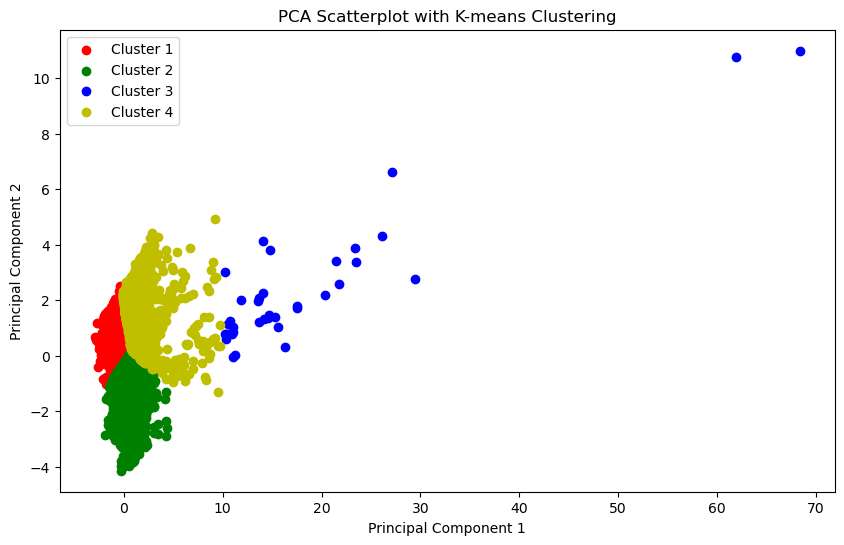

In [28]:
# Apply k-means clustering on the first two principal component scores
kmeans = KMeans(n_clusters=4, random_state=5508)
clusters_pca_kmeans = kmeans.fit_predict(data4_pca)

# Scatterplot of the first two principal components with different colors for each cluster
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    x_scatter = data4_pca[clusters_pca_kmeans == i, 0]
    y_scatter = data4_pca[clusters_pca_kmeans == i, 1]
    plt.scatter(data4_pca[clusters_pca_kmeans == i, 0], data4_pca[clusters_pca_kmeans == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot with K-means Clustering')
plt.legend()
plt.show()

### D10 Silhouette score for k-means clustering with k=2 to 20

In [29]:
k_values = range(2, 20, 1)
silhouette_scores = []

# Compute silhouette score for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5508)
    clusters = kmeans.fit_predict(data4_scaled)
    silhouette_scores.append(silhouette_score(data4_scaled, clusters))
    
# Print silhouette scores
table = pd.DataFrame({'k value': k_values, 'Silhouette score': silhouette_scores})
print(table.to_string(index=False))

 k value  Silhouette score
       2          0.324067
       3          0.324413
       4          0.327821
       5          0.293790
       6          0.294870
       7          0.294218
       8          0.250665
       9          0.241841
      10          0.247827
      11          0.248843
      12          0.244789
      13          0.241240
      14          0.244100
      15          0.244740
      16          0.229314
      17          0.229512
      18          0.223002
      19          0.217344


#### (a) Plot silhouette scores for different k values

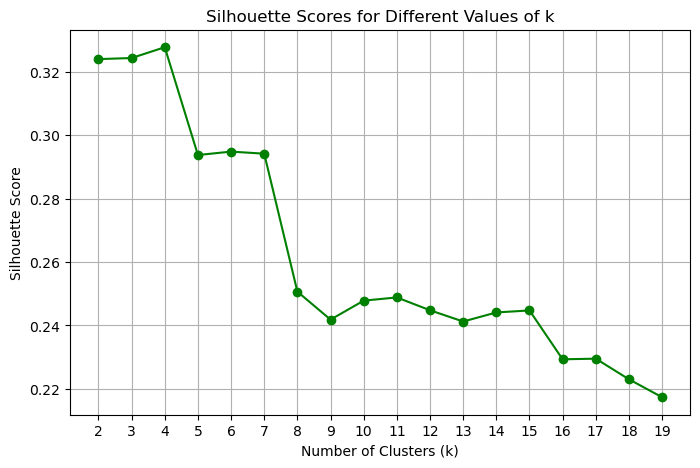

Optimal value of k for clustering: 4


In [30]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='g')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.grid(True)
plt.show()

# Get the optimal k value (the highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal value of k for clustering: {optimal_k}")

#### (b) Plot 

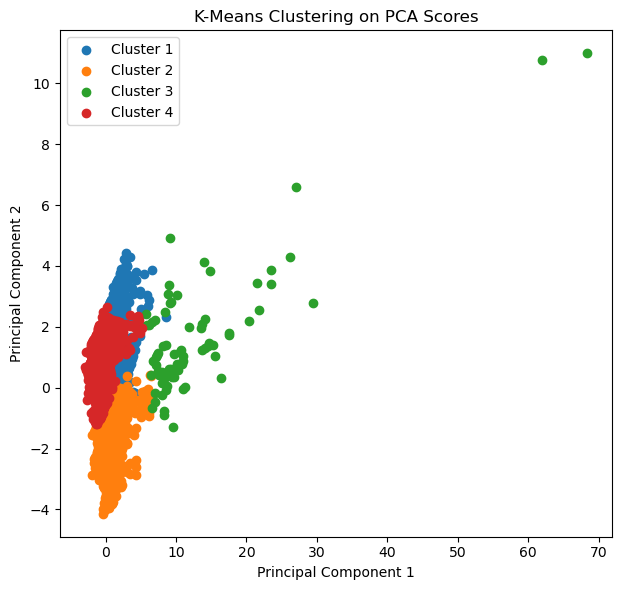

In [43]:
# Apply KMeans with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=5508)
clusters = kmeans.fit_predict(data4_scaled)

# Plot the k groups on the first two principal component scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(optimal_k):
    plt.scatter(data4_pca[clusters == i, 0], data4_pca[clusters == i, 1], label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Scores')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the first principal component scores with colors based on the deleted categorical variable
